In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

import utils.windFarms as wfman
from utils.networks import GraphNeuralNet as GNN
from utils.testUtils import test_compuation_time
import matplotlib.pyplot as plt
import scipy


import torch

## Initialize windfarm

In [3]:
x_grid_size = 4000
y_grid_size = 4000
base_config_path = '../configs/example_input_JK100.json'
update_config_path = '../configs/update_floris_configs.json'
single_input_path = '../configs/example_input_single.json'
min_distance_factor = 2.0

wind_farm_man = wfman.RandomSampleManager(x_grid_size=x_grid_size,
                                          y_grid_size=y_grid_size,
                                          update_config_json_path=update_config_path,
                                          base_config_json_path=base_config_path,
                                          single_input_path=single_input_path,
                                          angle_threshold=90,
                                          min_distance_factor=min_distance_factor,
                                          dist_cutoff_factor=25)

## Load trained models

In [4]:
pib_path = '../pib_saves/pib8'

pib = GNN.load(pib_path, device='cpu')
pib.eval()

GraphNeuralNet(
  (layers): ModuleList(
    (0): GraphNetworkBlock(
      (encoders): ModuleList(
        (0): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=8, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True)
          )
        )
        (1): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=54, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True

In [5]:
num_turbines = np.arange(5,50).tolist()
mean, std = test_compuation_time(pib, wind_farm_man, num_turbines, num_sampling=40)

[0/45] Comutping 5 case 
[1/45] Comutping 6 case 
[2/45] Comutping 7 case 
[3/45] Comutping 8 case 
[4/45] Comutping 9 case 
[5/45] Comutping 10 case 
[6/45] Comutping 11 case 
[7/45] Comutping 12 case 
[8/45] Comutping 13 case 
[9/45] Comutping 14 case 
[10/45] Comutping 15 case 
[11/45] Comutping 16 case 
[12/45] Comutping 17 case 
[13/45] Comutping 18 case 
[14/45] Comutping 19 case 
[15/45] Comutping 20 case 
[16/45] Comutping 21 case 
[17/45] Comutping 22 case 
[18/45] Comutping 23 case 
[19/45] Comutping 24 case 
[20/45] Comutping 25 case 
[21/45] Comutping 26 case 
[22/45] Comutping 27 case 
[23/45] Comutping 28 case 
[24/45] Comutping 29 case 
[25/45] Comutping 30 case 
[26/45] Comutping 31 case 
[27/45] Comutping 32 case 
[28/45] Comutping 33 case 
[29/45] Comutping 34 case 
[30/45] Comutping 35 case 
[31/45] Comutping 36 case 
[32/45] Comutping 37 case 
[33/45] Comutping 38 case 
[34/45] Comutping 39 case 
[35/45] Comutping 40 case 
[36/45] Comutping 41 case 
[37/45] Comutpin

In [6]:
pib_upper = np.array(mean) + np.array(std)
pib_lower = np.array(mean) - np.array(std)

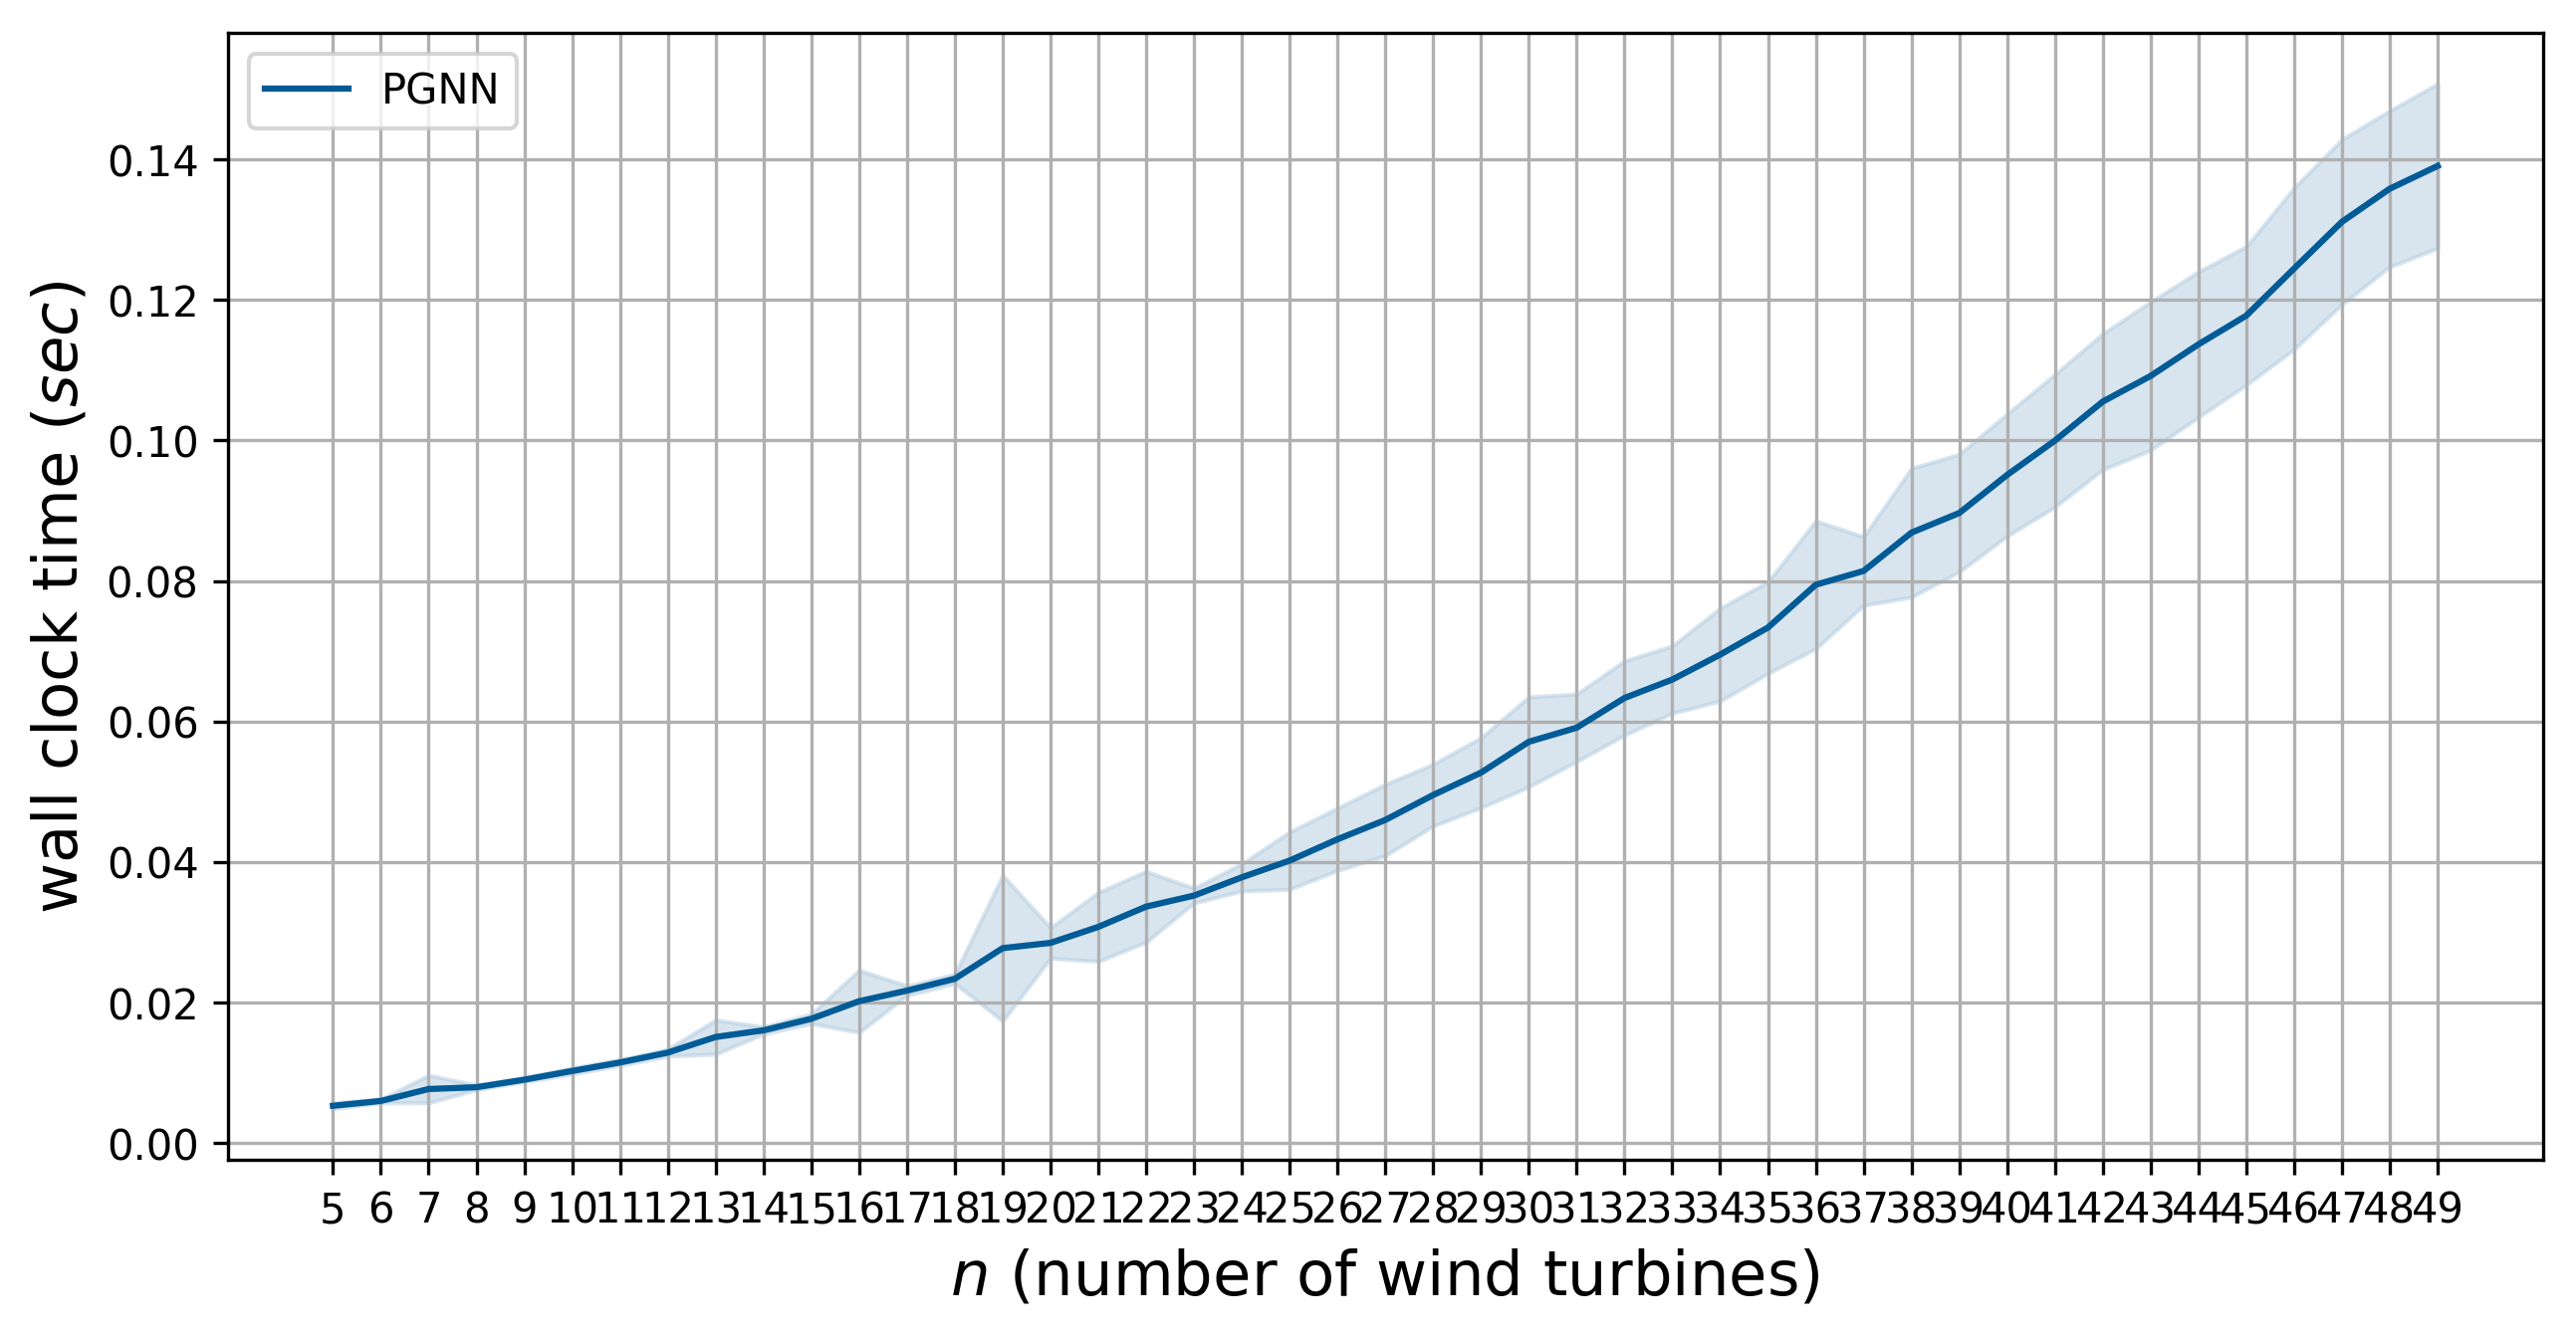

In [7]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.fill_between(num_turbines, pib_upper, pib_lower, color='#b3cde0', alpha=0.5, label='+/- 1 std')
pib_pred, = ax.plot(num_turbines, mean, '-', c='#005b96', label='PGNN')

ax.legend(handles=[pib_pred], loc='upper left')
ax.set_xlabel(r'$n$ (number of wind turbines)',fontsize=15)
ax.set_xticks(num_turbines)
ax.set_ylabel(r'wall clock time $(sec)$',fontsize=15)
ax.grid()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__